<a href="https://colab.research.google.com/github/Prabhdeepsing1/ML-lab-IIIT-H-/blob/main/Copy_of_AIML_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

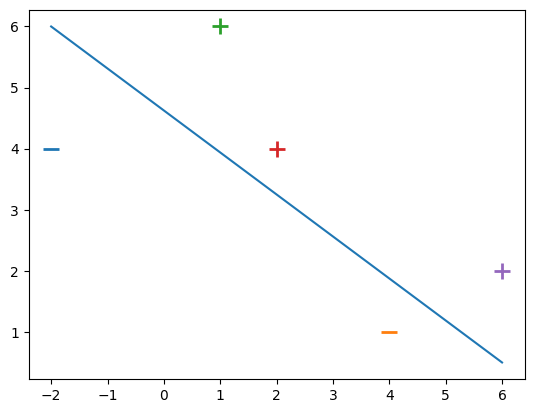

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

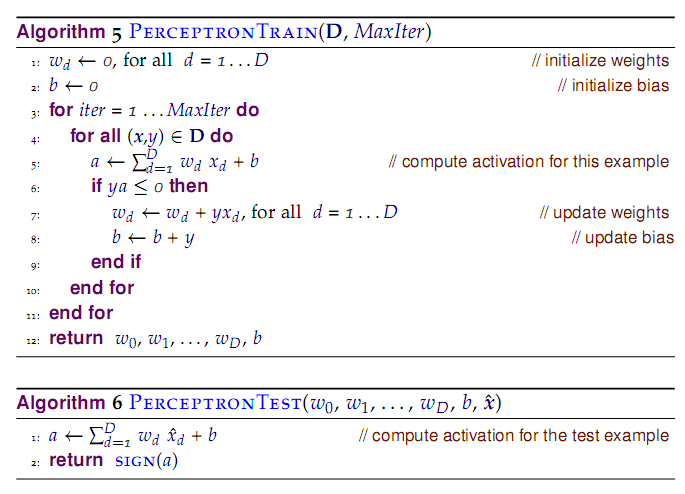

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

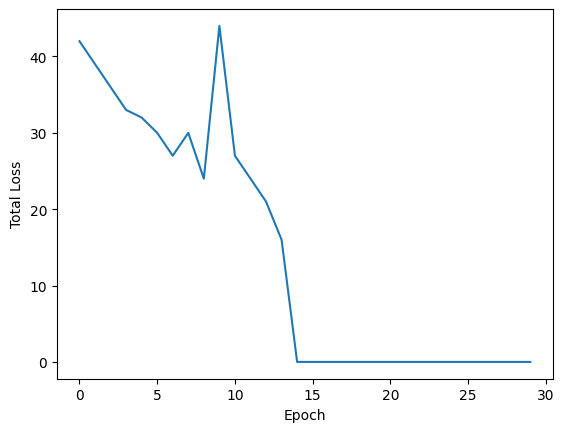

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

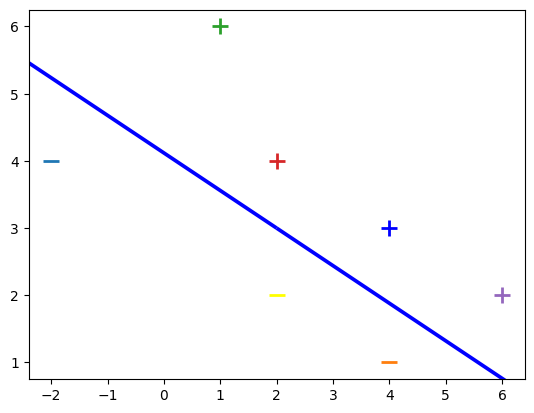

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



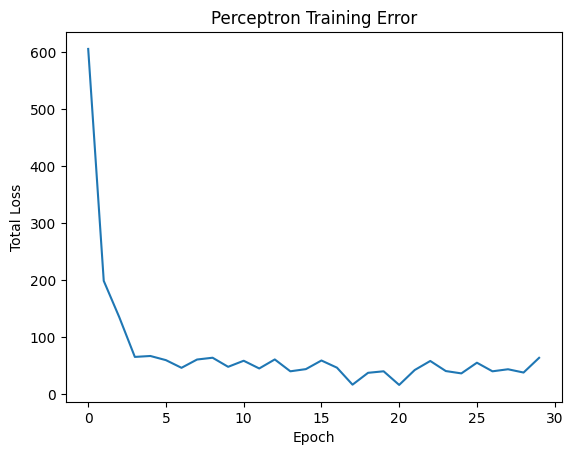

Weights: [ 35.5 -60.9]


In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

def perceptron_algo_plot(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Perceptron Training Error')
    plt.show()
    return w

iris = load_iris()
X = iris.data[:, :2]
y = np.where(iris.target == 0, -1, 1)


X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)


w = perceptron_algo_plot(X_train, y_train)

print("Weights:", w)

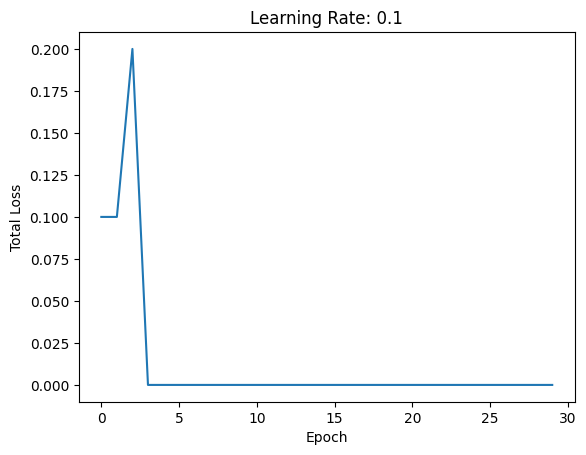

Learning rate: 0.1, Final weights: [ 0.2  0.1 -0.2], Errors: [np.float64(0.1), np.float64(0.1), np.float64(0.20000000000000004), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Converged for learning rate 0.1


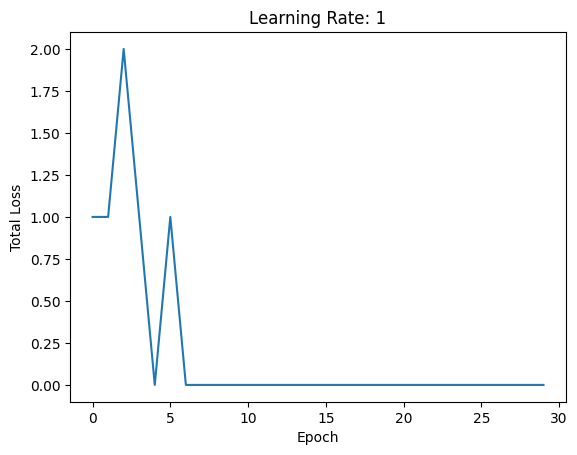

Learning rate: 1, Final weights: [ 3.  2. -4.], Errors: [np.float64(1.0), np.float64(1.0), np.float64(2.0), np.float64(1.0), np.float64(-0.0), np.float64(1.0), np.float64(-0.0), np.float64(-0.0), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Converged for learning rate 1


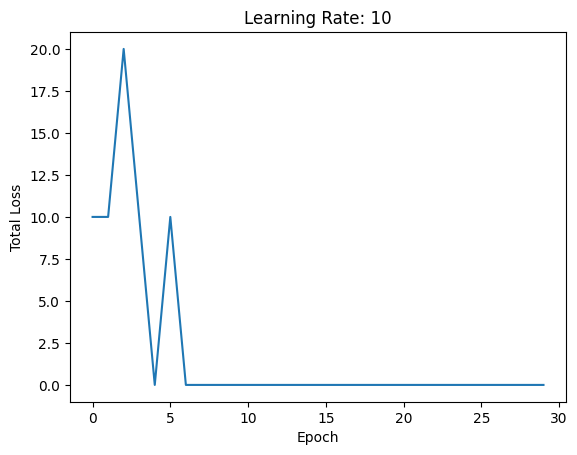

Learning rate: 10, Final weights: [ 30.  20. -40.], Errors: [np.float64(10.0), np.float64(10.0), np.float64(20.0), np.float64(10.0), np.float64(-0.0), np.float64(10.0), np.float64(-0.0), np.float64(-0.0), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Converged for learning rate 10


In [17]:
import numpy as np
from matplotlib import pyplot as plt

def perceptron_algo_plot(X, Y, eta):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title(f'Learning Rate: {eta}')
    plt.show()

    return w, errors

# Example usage with different learning rates
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1],
])
y = np.array([-1, -1, -1, 1])

learning_rates = [0.1, 1, 10]

for eta in learning_rates:
    w, errors = perceptron_algo_plot(X, y, eta)
    print(f"Learning rate: {eta}, Final weights: {w}, Errors: {errors}")
    if all(error == 0 for error in errors[-5:]): #check convergence in last 5 epochs
      print(f"Converged for learning rate {eta}")
    else:
      print(f"Did not converge for learning rate {eta}")

In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


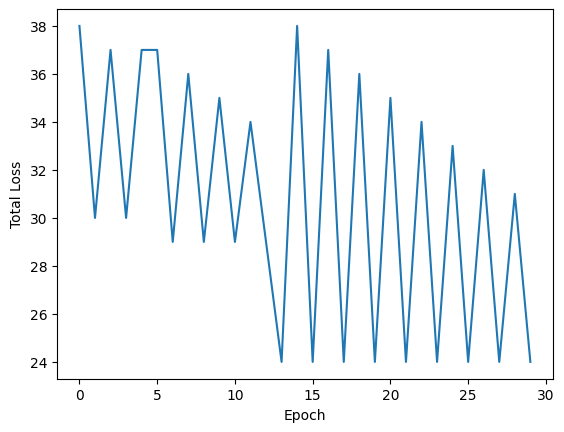

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

1)Yes, the AND dataset is learnable by a Perceptron. The AND function is linearly separable, meaning there exists a hyperplane (line in this case) that can perfectly separate the positive and negative examples.

ii) Weights Update Procedure:

Here's the update procedure for each iteration, starting with w0 = 0 and b0 = 0:

Iteration 1:

Input: x = (0, 0), y = -
Prediction: w0 * x + b0 = 0 * (0, 0) + 0 = 0
Since prediction is not -, update weights:
w1 = w0 + learning_rate * x * y = 0 + learning_rate * (0, 0) * (-1) = 0
b1 = b0 + learning_rate * y = 0 + learning_rate * (-1) = -learning_rate
Iteration 2:

Input: x = (0, 1), y = -
Prediction: w1 * x + b1 = 0 * (0, 1) + (-learning_rate) = -learning_rate
Since prediction is -, no update is needed.
Iteration 3:

Input: x = (1, 0), y = -
Prediction: w1 * x + b1 = 0 * (1, 0) + (-learning_rate) = -learning_rate
Since prediction is -, no update is needed.
Iteration 4:

Input: x = (1, 1), y = +
Prediction: w1 * x + b1 = 0 * (1, 1) + (-learning_rate) = -learning_rate
Since prediction is not +, update weights:
w2 = w1 + learning_rate * x * y = 0 + learning_rate * (1, 1) * (1) = (learning_rate, learning_rate)
b2 = b1 + learning_rate * y = -learning_rate + learning_rate * (1) = 0
Continue iterating through the dataset, and the Perceptron will eventually converge to weights that correctly classify all examples.

2)Out of the 16 possible boolean functions over a 2-bit binary input, 14 are learnable by a Perceptron. These are the functions that are linearly separable.

Non-Learnable Functions:

The two functions that are not learnable are:

XOR (Exclusive OR):
XNOR (Exclusive NOR):
The XOR and XNOR functions are not linearly separable. There is no single straight line that can separate the positive and negative examples in their truth tables.